# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv 
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.

In [46]:
#Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
from sklearn.metrics import r2_score

In [3]:
#Load Data
df = pd.read_csv('./data/cars_hw.csv')
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [4]:
#drop the extra column
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [5]:
df['No_of_Owners'].unique()

array(['1st', '2nd', '3rd'], dtype=object)

In [6]:
#Make No_of_Owners numeric
df.loc[df['No_of_Owners'] == '1st', 'No_of_Owners'] = 1
df.loc[df['No_of_Owners'] == '2nd', 'No_of_Owners'] = 2
df.loc[df['No_of_Owners'] == '3rd', 'No_of_Owners'] = 3
df['No_of_Owners'] = pd.to_numeric(df['No_of_Owners'])
df['No_of_Owners'].unique()

array([1, 2, 3])

In [7]:
df['Price'] = np.log(df['Price'])

<AxesSubplot:>

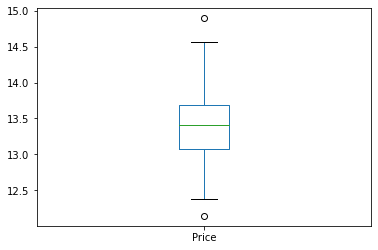

In [8]:
df['Price'].plot.box()

In [9]:
#Remove outliers from Price
var='Price'
Q1 = df[var].quantile(0.25)
Q3 = df[var].quantile(0.75)
IQR = Q3-Q1
threshold = 1.5
df = df.loc[(df[var]<Q3+threshold*IQR),:]

<AxesSubplot:>

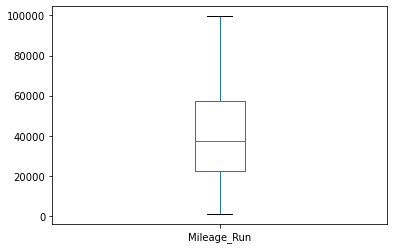

In [10]:
df['Mileage_Run'].plot.box()

2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?

In [11]:
make_df = df.groupby('Make')
make_df['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,12.919895,0.480975,12.495004,12.568392,12.752286,13.171681,13.701221
Datsun,3.0,12.576047,0.036311,12.538967,12.558302,12.577636,12.594587,12.611538
Ford,52.0,13.468280,0.210895,12.577636,13.361380,13.469493,13.575984,13.879424
Honda,73.0,13.536318,0.336972,12.663497,13.272506,13.573439,13.726679,14.245343
Hyundai,305.0,13.368511,0.398781,12.421184,13.091904,13.366094,13.637579,14.370544
Jeep,4.0,14.216591,0.105084,14.070153,14.183270,14.240265,14.273586,14.315680
Kia,8.0,14.292177,0.076877,14.129591,14.272242,14.303105,14.349515,14.369970
MG Motors,35.0,14.439052,0.066263,14.278615,14.395744,14.429615,14.497597,14.518113
Mahindra,18.0,13.898953,0.159906,13.587354,13.851808,13.905680,13.961249,14.197366


<AxesSubplot:xlabel='Price', ylabel='Density'>

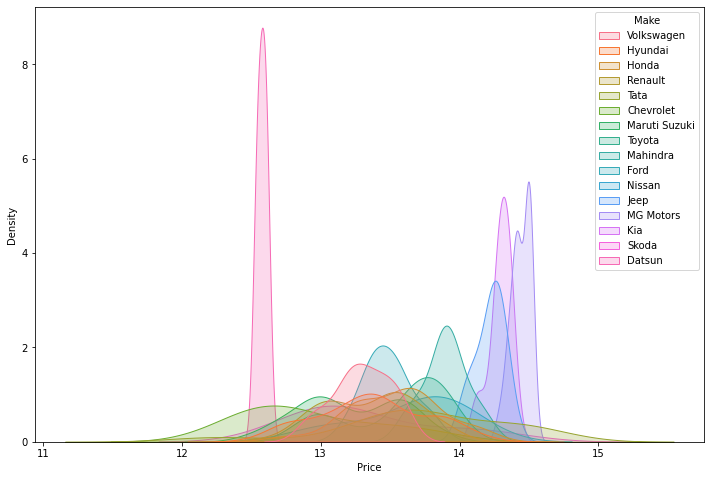

In [12]:
plt.figure(figsize=(12,8))
sns.set_palette('Paired')
sns.kdeplot(data=df, x = 'Price', hue = 'Make', fill = True, warn_singular = False, common_norm = False)

MG Motors and Kia have some of the most expensive cars. Most of the prices are all located around the same value, but some makes have a larger/smaller variance in their prices.

  3. Split the data into an 80% training set and a 20% testing set.

In [13]:
X = df.loc[:,df.columns!='Price']
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1000)

  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?

In [14]:
X_train_num = X_train.select_dtypes(include='number')
X_test_num = X_test.select_dtypes(include='number')

In [15]:
reg = LinearRegression().fit(X_train_num, y_train)
y_hat = reg.predict(X_test_num)
print('R-squared: ',reg.score(X_test_num,y_test))
RMSE = math.sqrt(sum((y_test-y_hat)**2)/len(y_hat))
print('RMSE: ', RMSE)

R-squared:  0.4234048903005986
RMSE:  0.34806211757327543


In [16]:
X_train_cat = X_train.select_dtypes(exclude='number')
X_train_make = pd.get_dummies(X_train_cat['Make'], dtype='int', drop_first = True)
X_train_color = pd.get_dummies(X_train_cat['Color'], dtype='int', drop_first = True)
X_train_bt = pd.get_dummies(X_train_cat['Body_Type'], dtype='int', drop_first = True)
X_train_ft = pd.get_dummies(X_train_cat['Fuel_Type'], dtype='int', drop_first = True)
X_train_trans = pd.get_dummies(X_train_cat['Transmission'], dtype='int', drop_first=True)
X_train_tt = pd.get_dummies(X_train_cat['Transmission_Type'], dtype='int', drop_first = True)
X_train_cat = pd.concat([X_train_make, X_train_color, X_train_bt, X_train_ft, X_train_trans,
                        X_train_tt], axis=1)

X_test_cat = X_test.select_dtypes(exclude='number')
X_test_make = pd.get_dummies(X_test_cat['Make'], dtype='int', drop_first = True)
X_test_color = pd.get_dummies(X_test_cat['Color'], dtype='int', drop_first = True)
X_test_bt = pd.get_dummies(X_test_cat['Body_Type'], dtype='int', drop_first= True)
X_test_ft = pd.get_dummies(X_test_cat['Fuel_Type'], dtype='int', drop_first = True)
X_test_trans = pd.get_dummies(X_test_cat['Transmission'], dtype='int', drop_first = True)
X_test_tt = pd.get_dummies(X_test_cat['Transmission_Type'], dtype='int', drop_first =True)
X_test_cat = pd.concat([X_test_make, X_test_color, X_test_bt, X_test_ft, X_test_trans,
                        X_test_tt], axis=1)
#Add missing columns to test frame
X_test_cat['Datsun'] = 0
X_test_cat['Nissan']  = 0
X_test_cat['green'] = 0
X_test_cat['maroon'] = 0
X_test_cat['yellow'] = 0
X_test_cat['petrol+cng'] = 0
X_test_cat['CVT'] = 0
print(X_train_cat.shape)
print(X_test_cat.shape)

(780, 40)
(195, 40)


In [17]:
reg = LinearRegression().fit(X_train_cat, y_train)
y_hat = reg.predict(X_test_cat)
print('R-squared: ',reg.score(X_test_cat,y_test))
RMSE = math.sqrt(sum((y_test-y_hat)**2)/len(y_hat))
print('RMSE: ', RMSE)

R-squared:  -0.42859214852814875
RMSE:  0.5478673381992506


In [18]:
X_train = pd.concat([X_train_cat, X_train_num], axis=1)
X_test = pd.concat([X_test_cat, X_test_num], axis=1)

In [19]:
reg = LinearRegression().fit(X_train, y_train)
y_hat = reg.predict(X_test)
print('R-squared: ',reg.score(X_test,y_test))
RMSE = math.sqrt(sum((y_test-y_hat)**2)/len(y_hat))
print('RMSE: ', RMSE)

R-squared:  0.3618135346440271
RMSE:  0.3661803837318639


The numeric model performs the best with the joint model performing slightly worse. This can be seen through the lower value of r squared for the joint model and a higher RMSE.

  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?

In [21]:
for i in range(1,5):
    temp_df_train = X_train
    temp_df_test = X_test
    expander = PolynomialFeatures(degree=i, include_bias=False)
    Z_train = expander.fit_transform(temp_df_train)
    Z_test = expander.fit_transform(temp_df_test)
    names_train = expander.get_feature_names(temp_df_train.columns)
    names_test = expander.get_feature_names(temp_df_test.columns)
    expanded_X_train = pd.DataFrame(data=Z_train, columns=names_train)
    expanded_X_test = pd.DataFrame(data=Z_test, columns=names_test)
    reg = LinearRegression().fit(expanded_X_train, y_train)
    y_hat = reg.predict(expanded_X_test)
    print('R-squared for degree ', i, ': ',reg.score(expanded_X_test,y_test))
    RMSE = math.sqrt(sum((y_test-y_hat)**2)/len(y_hat))
    print('RMSE for degree ', i, ': ', RMSE)

R-squared for degree  1 :  0.3618135346440271
RMSE for degree  1 :  0.3661803837318639
R-squared for degree  2 :  -5599.643596083838
RMSE for degree  2 :  34.30364340240062
R-squared for degree  3 :  -1264190.4458983545
RMSE for degree  3 :  515.380169981134
R-squared for degree  4 :  -16818313.369149815
RMSE for degree  4 :  1879.8037592355433


As I increased the degree of expansion the rsquared and performance of the model became worse. The best expansion was with degree 1 which gives the same metrics as the combined categorical and numeric regression in part 3. However, the nummeric regression model of part 3 performs better as can be seen by its larger r squared and smaller RMSE.

  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

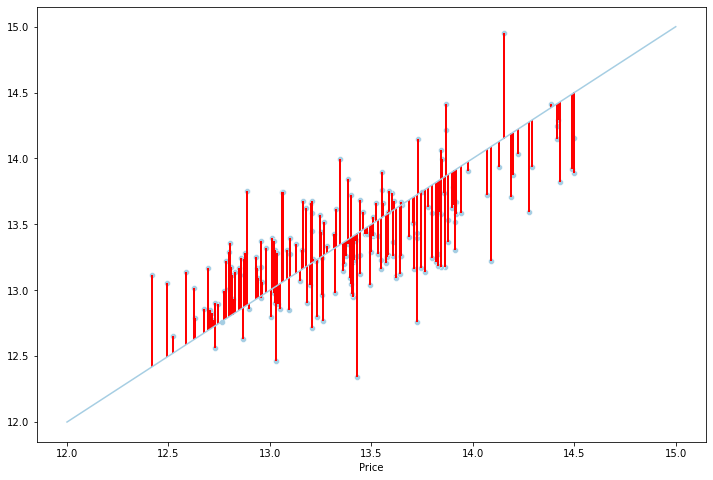

In [42]:
X_train_num = X_train.select_dtypes(include='number')
X_test_num = X_test.select_dtypes(include='number')
reg = LinearRegression().fit(X_train_num, y_train)
y_hat = reg.predict(X_test_num)
plt.figure(figsize=(12,8))
sns.scatterplot(x=y_test, y=y_hat)

for i in range(len(y_hat)):
    plt.vlines(y_test, y_test, y_hat, color='red')
linear_x = np.linspace(12,15,1)
linear_y = np.linspace(12,15,1)
plt.plot([12,15],[12,15])
plt.show()

The predicted values very roughly line with diagonal, but there is a significat number of missed predictions, either too high or too low.

<AxesSubplot:ylabel='Density'>

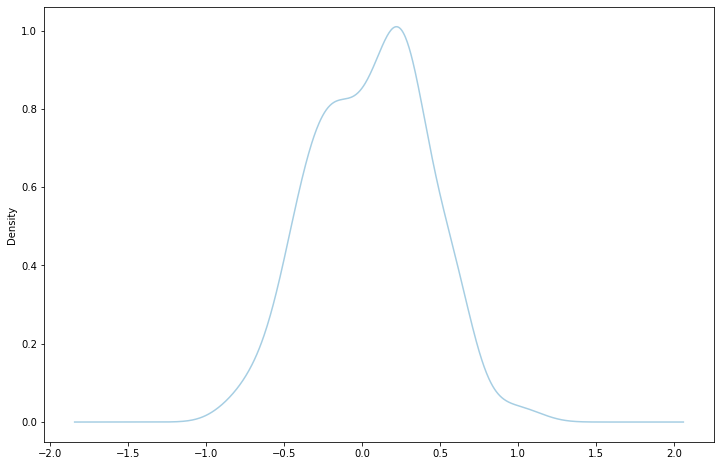

In [44]:
plt.figure(figsize=(12,8))
residuals = y_test-y_hat
residuals.plot.kde()

The residual kernel density plot roughly looks like a bell shaped curve centered at zero.

 7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?

In [59]:
max_r_squared = 0
depth_max = 0
for d in range(1,30):
    regtree = tree.DecisionTreeRegressor(max_depth=d)
    regtree = regtree.fit(X_train, y_train)
    y_hat = regtree.predict(X_test)
    r_2 = r2_score(y_test, y_hat)
    print('R squared depth= ', d, ': ', r_2)
    if r_2 > max_r_squared:
        max_r_squared = r_2
        depth_max = d
    RMSE = math.sqrt(sum((y_test-y_hat)**2)/len(y_hat))
    print('RMSE: ', RMSE)
    
print('Best model is with depth=', depth_max, 'and a r squared of ', max_r_squared)

R squared depth=  1 :  -0.03352743801811808
RMSE:  0.46599610437221095
R squared depth=  2 :  0.22131701633289014
RMSE:  0.40448425685409584
R squared depth=  3 :  0.24906631299278237
RMSE:  0.39721173848071617
R squared depth=  4 :  0.31948858376570866
RMSE:  0.3781281312595969
R squared depth=  5 :  0.3902051778212765
RMSE:  0.3579424010095715
R squared depth=  6 :  0.2589112978100522
RMSE:  0.39459936042393373
R squared depth=  7 :  0.3558148267759994
RMSE:  0.3678973360374926
R squared depth=  8 :  0.23948787894872703
RMSE:  0.39973700189053274
R squared depth=  9 :  0.3097236704072569
RMSE:  0.3808314193140566
R squared depth=  10 :  0.30044569350134975
RMSE:  0.383382246571103
R squared depth=  11 :  0.2987036132528066
RMSE:  0.3838593127172337
R squared depth=  12 :  0.26744156658905216
RMSE:  0.3923217781962638
R squared depth=  13 :  0.23287578287940758
RMSE:  0.4014709514697073
R squared depth=  14 :  0.17391292975324424
RMSE:  0.41661431953245287
R squared depth=  15 :  0.17

A Regression tree of depth 5 gives the best results.

  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?

In [60]:
regtree = tree.DecisionTreeRegressor(max_depth=5)
regtree = regtree.fit(X_train, y_train)
y_hat = regtree.predict(X_test)

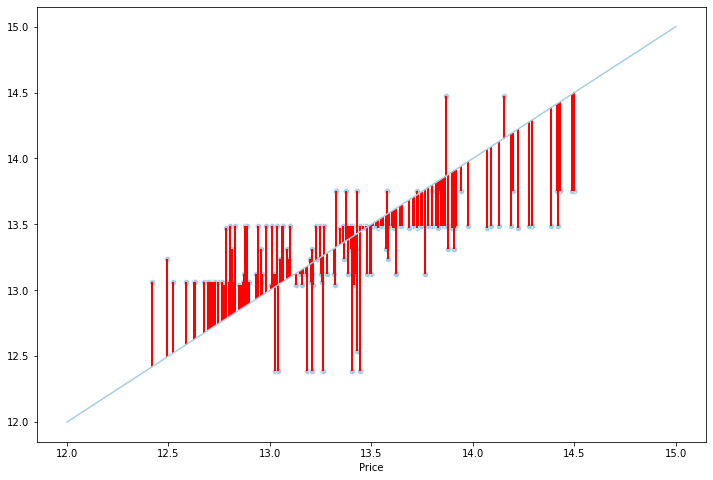

In [61]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=y_test, y=y_hat)

for i in range(len(y_hat)):
    plt.vlines(y_test, y_test, y_hat, color='red')
linear_x = np.linspace(12,15,1)
linear_y = np.linspace(12,15,1)
plt.plot([12,15],[12,15])
plt.show()

The predicted values roughly line with the diagonal, but there is significant larger amount of predicted values smaller than the actual.

<AxesSubplot:ylabel='Density'>

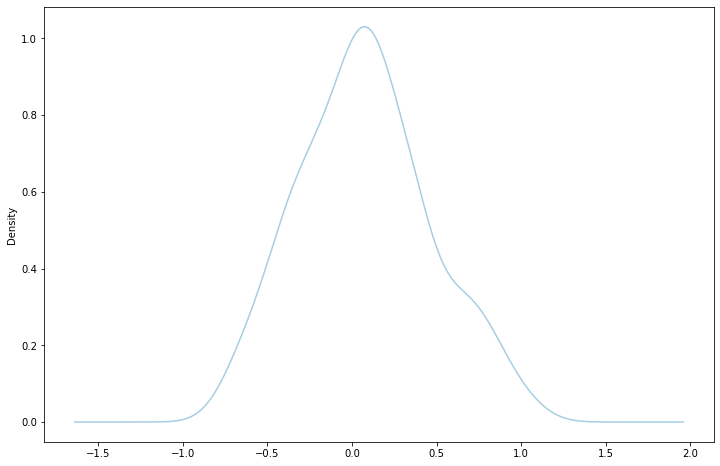

In [62]:
plt.figure(figsize=(12,8))
residuals = y_test-y_hat
residuals.plot.kde()

The residual kernel density plot does roughly look like a bell shaped curve around zero.

  9. Which model --- linear model or classification and regression tree --- has better performance on the test set?

The linear regression based off of the numeric variables had the best performance of the test set with a r-squared value of 0.4234048903005986 and a RMSE of 0.34806211757327543. The regression tree with a max_dept of 5 was a close second with a r-squared of 0.3902051778212765 and RMSE of 0.3579424010095715.

**Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.
  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set? 
  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?
  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?
  5. Run a linear regression of `avg_salary` on all the variables. What is the $R^2$ on the test set? How does it compare to your simpler models in 2--4? 
  6. Build a decision tree by regressing `avg_salary` on `Sector`, `Rating`, and the (Sector, Rating) pairs. What are the $R^2$ and `RMSE` of your models on the test set? How do your answers compare to parts 2, 3, and 4?
  7. Build a decision tree by regressing `avg_salary` on all the other variables. What is the $R^2$ and `RMSE` on the test set?
  8. Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the $R^2$ and `RMSE` of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high 
    - Husband's education (categorical) 1=low, 2, 3, 4=high 
    - Number of children ever born (numerical) 
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?

In [66]:
#Imports
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree

In [67]:
df = pd.read_csv('./data/contraception_hw.csv')
df.head()

,Unnamed: 0,age,edu,edu_spouse,numberChildren,religion,working,spouse_occupation,standardOfLivingIndex,mediaExposure,method
0,1,24,2,3,3,1,1,2,3,0,1
1,2,45,1,3,10,1,1,3,4,0,1
2,3,43,2,3,7,1,1,3,4,0,1
3,4,42,3,2,9,1,1,3,3,0,1
4,5,36,3,3,8,1,1,3,2,0,1


In [68]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,age,edu,edu_spouse,numberChildren,religion,working,spouse_occupation,standardOfLivingIndex,mediaExposure,method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [69]:
df['method'].value_counts()

1    629
3    511
2    333
Name: method, dtype: int64

In [70]:
crosstable = pd.crosstab(df['method'], df['numberChildren'])
print(crosstable)

numberChildren  0    1    2    3   4   5   6   7   8   9   10  11  12  13  16
method                                                                       
1               95  143  114   70  57  44  35  18  29   5   9   6   4   0   0
2                0   46   56   70  62  36  27  19   9   3   2   2   0   1   0
3                2   87  106  119  78  55  30  12   9   8   0   3   0   1   1


In [71]:
total_no = 0
total_short = 0
total_long = 0
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,16]:
    total_no += crosstable.loc[1].loc[i]*i
    total_short += crosstable.loc[3].loc[i]*i
    total_long += crosstable.loc[2].loc[i]*i
    
print("No Contraceptive: ", total_no)
print("Short Term: ", total_short)
print("Long Term: ", total_long)

No Contraceptive:  1846
Short Term:  1713
Long Term:  1245


The couples that do not use contraceptives tend to have more children.

  2. Split the sample into ~80% training data and ~20% testing data.

In [72]:
X = df.loc[:,df.columns!='method']
y = df['method']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1000)

  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.

In [134]:
regtree = tree.DecisionTreeRegressor()
regtree = regtree.fit(X_train, y_train)

[Text(117.93615113437065, 212.71304347826086, 'X[3] <= 0.5\nmse = 0.76\nsamples = 1178\nvalue = 1.919'),
 Text(34.1972344619666, 203.2591304347826, 'X[0] <= 17.5\nmse = 0.095\nsamples = 82\nvalue = 1.049'),
 Text(33.576084183673466, 193.80521739130435, 'mse = 0.0\nsamples = 1\nvalue = 3.0'),
 Text(34.81838474025974, 193.80521739130435, 'X[6] <= 3.5\nmse = 0.049\nsamples = 81\nvalue = 1.025'),
 Text(34.1972344619666, 184.3513043478261, 'mse = 0.0\nsamples = 77\nvalue = 1.0'),
 Text(35.439535018552874, 184.3513043478261, 'X[0] <= 23.5\nmse = 0.75\nsamples = 4\nvalue = 1.5'),
 Text(34.81838474025974, 174.89739130434782, 'mse = 0.0\nsamples = 1\nvalue = 3.0'),
 Text(36.06068529684601, 174.89739130434782, 'mse = 0.0\nsamples = 3\nvalue = 1.0'),
 Text(201.67506780677468, 203.2591304347826, 'X[0] <= 37.5\nmse = 0.749\nsamples = 1096\nvalue = 1.984'),
 Text(116.40691357331285, 193.80521739130435, 'X[3] <= 2.5\nmse = 0.751\nsamples = 767\nvalue = 2.136'),
 Text(54.042803875811686, 184.351304347

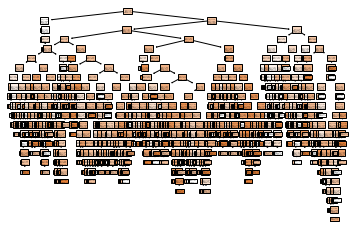

In [138]:
tree.plot_tree(regtree,filled=True)

The regression treats the classification variables as continuous variables so the splits in the tree model do not make sense.

  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?

In [73]:
clastree = tree.DecisionTreeClassifier()
clastree = clastree.fit(X_train, y_train)

[Text(424.90031492930376, 1061.3142857142857, 'numberChildren <= 0.5\ngini = 0.648\nsamples = 1178\nvalue = [499, 275, 404]'),
 Text(128.93848580441642, 1009.5428571428572, 'age <= 17.5\ngini = 0.048\nsamples = 82\nvalue = [80, 0, 2]'),
 Text(126.92676881478143, 957.7714285714286, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(130.95020279405136, 957.7714285714286, 'spouse_occupation <= 3.5\ngini = 0.024\nsamples = 81\nvalue = [80, 0, 1]'),
 Text(128.93848580441642, 906.0, 'gini = 0.0\nsamples = 77\nvalue = [77, 0, 0]'),
 Text(132.96191978368634, 906.0, 'age <= 23.5\ngini = 0.375\nsamples = 4\nvalue = [3, 0, 1]'),
 Text(130.95020279405136, 854.2285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(134.97363677332132, 854.2285714285715, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(720.862144054191, 1009.5428571428572, 'age <= 37.5\ngini = 0.656\nsamples = 1096\nvalue = [419, 275, 402]'),
 Text(482.2492289601172, 957.7714285714286, 'edu <= 3.5\ngini = 0.642\nsa

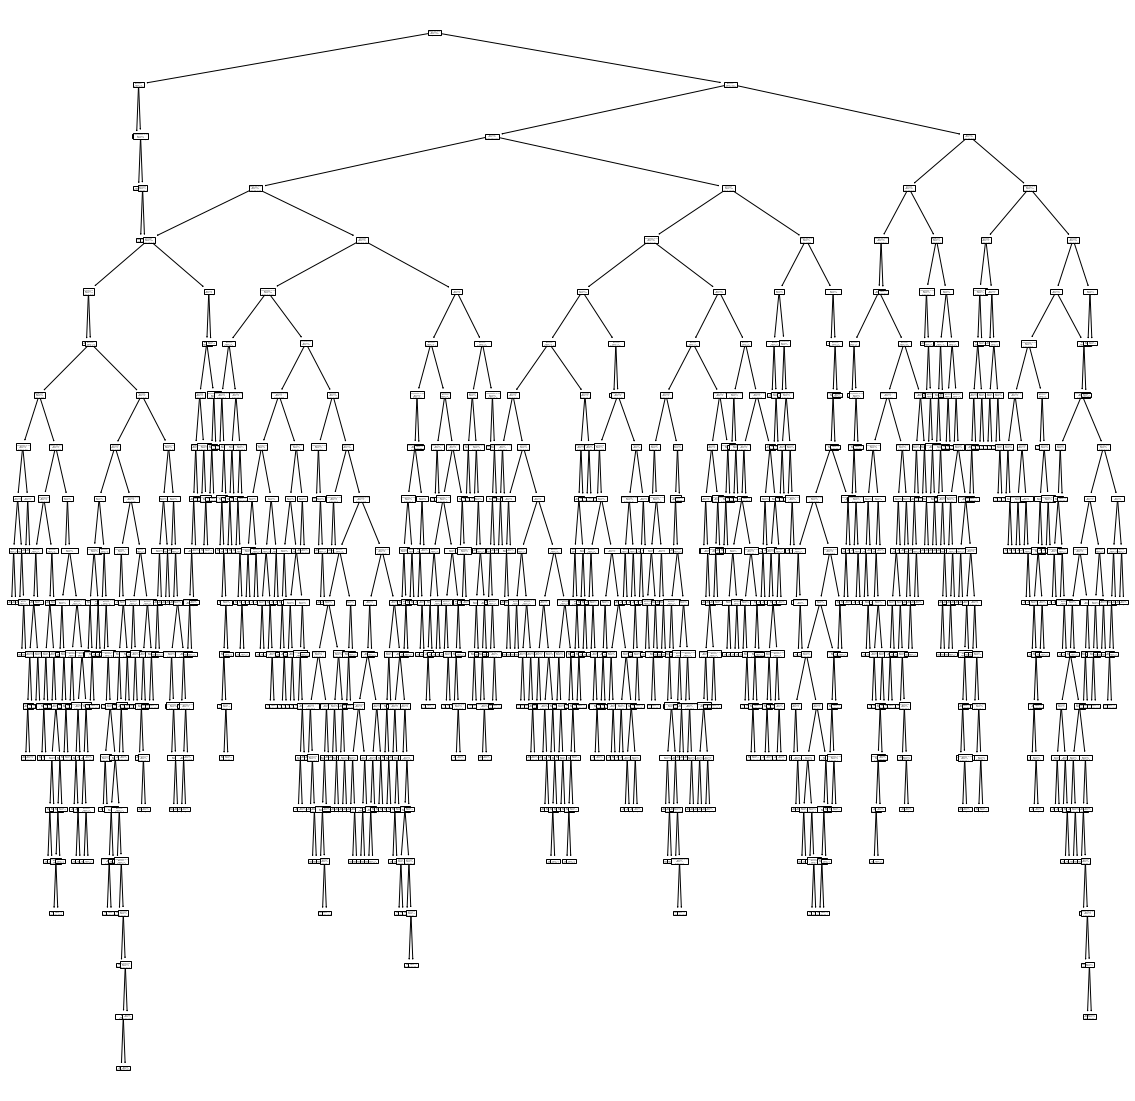

In [75]:
plt.figure(figsize=(20,20))
tree.plot_tree(clastree, feature_names=list(X_train.columns))

The model uses almost all of the variables given.

  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.

In [77]:
y_hat = clastree.predict(X_test)

tab = pd.crosstab(y_test, y_hat)

print(tab)

col_0    1   2   3
method            
1       81  20  29
2       17  23  18
3       33  27  47


In [78]:
total_acc = (tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[2,2])/(tab.iloc[0,0]+tab.iloc[0,1]+tab.iloc[0,2]+
                                                   tab.iloc[1,0]+tab.iloc[1,1]+tab.iloc[1,2]+
                                                   tab.iloc[2,0]+tab.iloc[2,1]+tab.iloc[2,2])
no_acc = (tab.iloc[0,0])/(tab.iloc[0,0]+tab.iloc[0,1]+tab.iloc[0,2])
long_acc = (tab.iloc[1,1])/(tab.iloc[1,0]+tab.iloc[1,1]+tab.iloc[1,2])
short_acc = (tab.iloc[2,0])/(tab.iloc[2,0]+tab.iloc[2,1]+tab.iloc[2,2])
print('Accuracy: ', total_acc)
print('No Contraceptive Accuracy: ', no_acc)
print('Long term Accuracy: ', long_acc)
print('Short term Accuracy: ', short_acc)

Accuracy:  0.511864406779661
No Contraceptive Accuracy:  0.6230769230769231
Long term Accuracy:  0.39655172413793105
Short term Accuracy:  0.308411214953271


  6. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

A linear probability model uses the numeric relationship of variables to predict the outcome. Here we have a variable method that takes a value 1,2, or 3 to classify the type of contraceptive method used, but the values of method (1,2, or 3) have no relation to each other (i.e. the classifications could be switched to have short term equal to 1 and no contraceptive to 3 and so on). Additionally, by performing the regression we are trying to split the data in two categories, but here we are dealing with three categories.

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent 
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where 
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?